### Imports
Import these packages to the project.

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 50.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
!pip install keras tensorflow matplotlib numpy

In [4]:
from __future__ import division
import numpy as np
import os
import glob

from random import *
from PIL import Image
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, Activation, BatchNormalization
from keras.layers import Conv2D, Cropping2D, ZeroPadding2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam, RMSprop

These are the forms in the dataset for quick access from manipulation of the file names on each column. Let's create a dictionary with form and writer mapping.

In [5]:
d = {}
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
# forms = pd.read_csv('../input/iam-handwriting-top50/forms_for_parsing.txt', header=None)
# print(forms.head)
with open('/content/drive/MyDrive/OneWeb Projects/Handwriting Recognition CNN/forms_for_parsing.txt') as f:
    for line in f:
        key = line.split(' ')[0]
        writer = line.split(' ')[1]
        d[key] = writer
print(len(d.keys()))

1539


All file-names list and target-writer names list are created.

In [6]:
tmp = []
target_list = []

path_to_files = os.path.join('/content/drive/MyDrive/OneWeb Projects/Handwriting Recognition CNN/data_subset/data_subset', '*')
for filename in sorted(glob.glob(path_to_files)):
#     print(filename)
    tmp.append(filename)
    image_name = filename.split('/')[-1]
    file, ext = os.path.splitext(image_name)
    parts = file.split('-')
    form = parts[0] + '-' + parts[1]
    for key in d:
        if key == form:
            target_list.append(str(d[form]))

img_files = np.asarray(tmp)
img_targets = np.asarray(target_list)
print(img_files.shape)
print(img_targets.shape)

(4899,)
(4899,)


### Visualization of images
Let's visualize the image data.

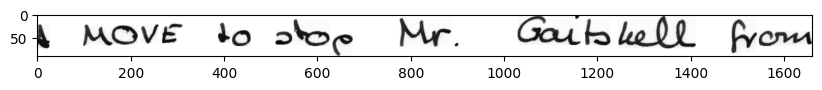

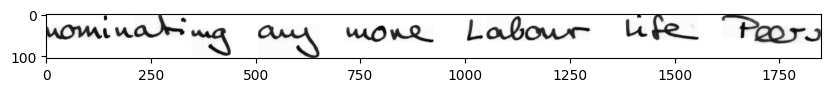

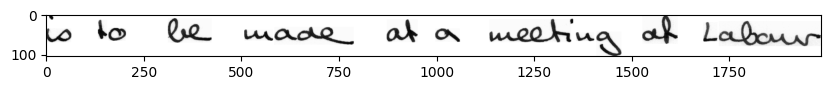

In [7]:
for filename in img_files[:3]:
    img=mpimg.imread(filename)
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap ='gray')

Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import os
import glob


<ipython-input-9-f59ac52f0ceb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_writers, y=counts, palette="viridis")


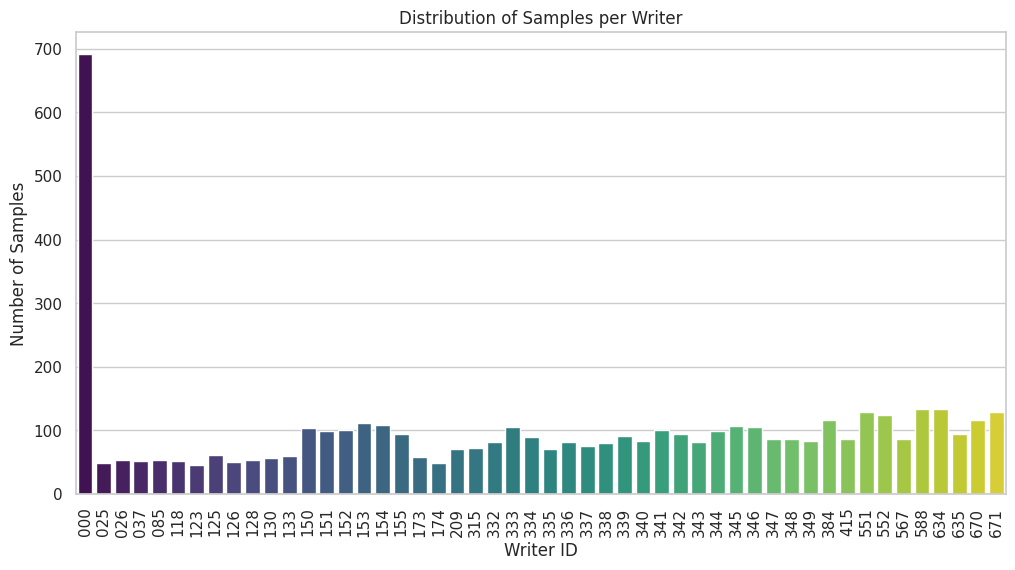

In [9]:
# Set the style of the visualization
sns.set(style="whitegrid")

# 1. Distribution of Samples per Writer
unique_writers, counts = np.unique(img_targets, return_counts=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_writers, y=counts, palette="viridis")
plt.xlabel('Writer ID')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples per Writer')
plt.xticks(rotation=90)  # Rotating X-axis labels for better readability
plt.show()

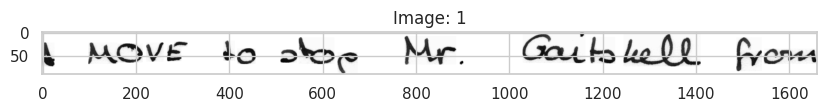

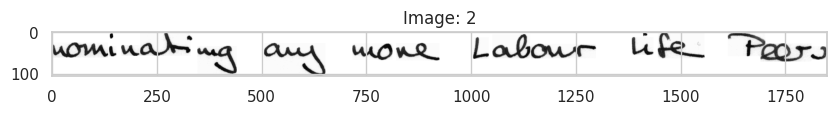

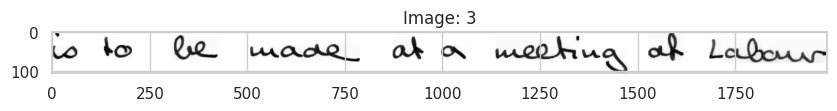

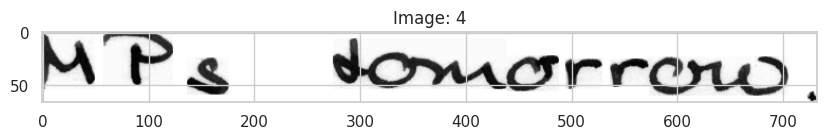

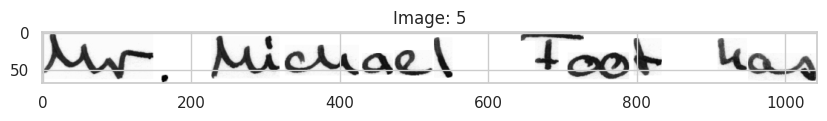

In [13]:
# 2. Sample Images Visualization
# Displaying first 5 images
def visualize_images(img_files, num_images=5):
    for i in range(num_images):
        img = mpimg.imread(img_files[i])
        plt.figure(figsize=(10, 10))
        plt.imshow(img, cmap='gray')
        plt.title(f"Image: {i+1}")
        plt.show()

visualize_images(img_files, num_images=5)

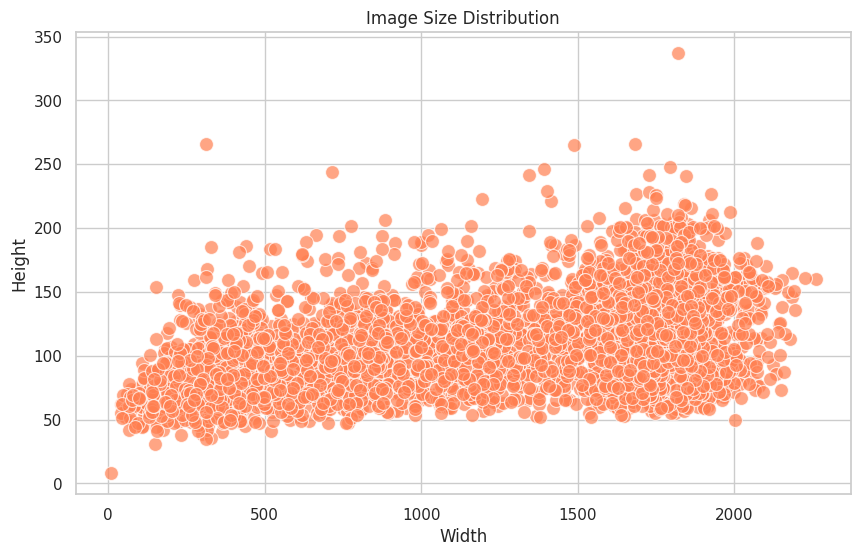

In [11]:
# 3. Image Size Distribution
image_sizes = [mpimg.imread(file).shape for file in img_files]
widths, heights = zip(*[(size[1], size[0]) for size in image_sizes if len(size) == 2])  # Assuming grayscale images

plt.figure(figsize=(10, 6))
sns.scatterplot(x=widths, y=heights, alpha=0.7, edgecolor='w', s=100, color='coral')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Size Distribution')
plt.show()


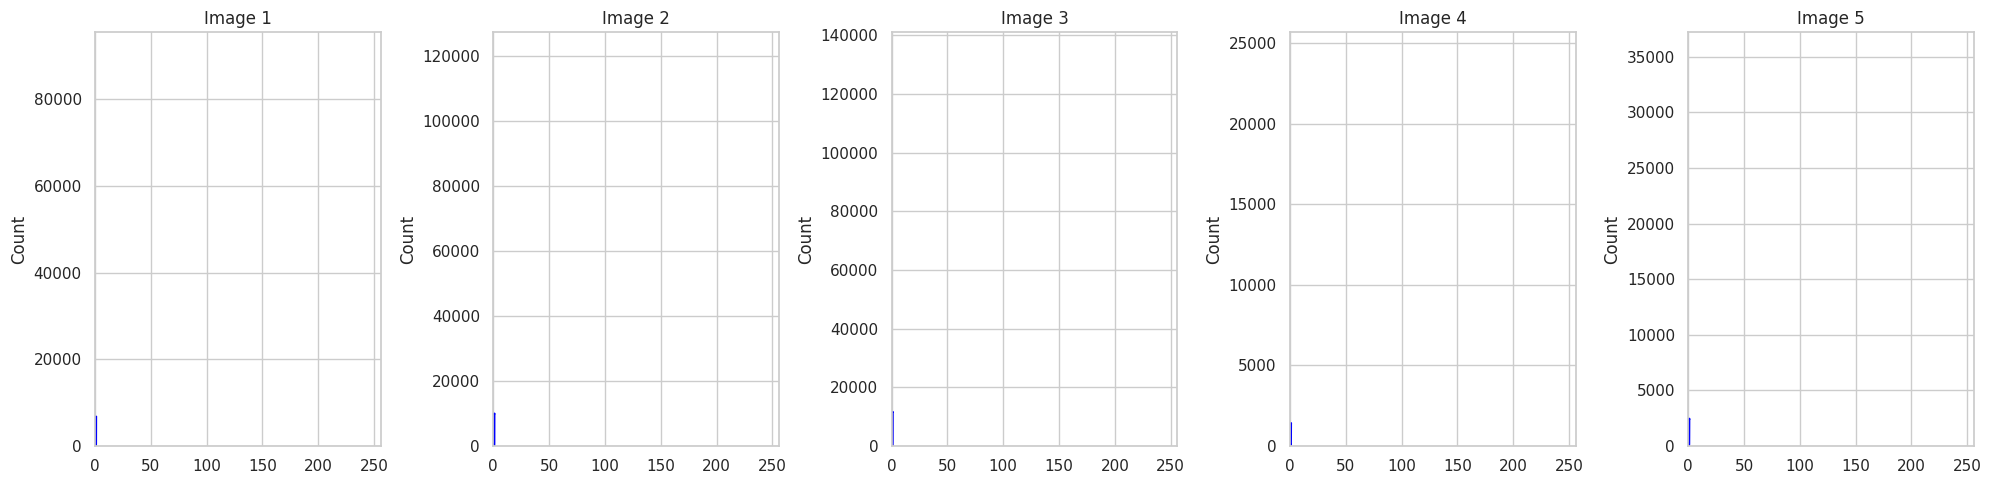

In [12]:
# 4. Pixel Intensity Distribution
# Analyzing first 5 images
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(axes):
    img = mpimg.imread(img_files[i])
    sns.histplot(img.ravel(), bins=256, ax=ax, kde=True, color="blue", edgecolor='w')
    ax.set_title(f"Image {i+1}")
    ax.set_xlim([0, 256])
plt.tight_layout()
plt.show()

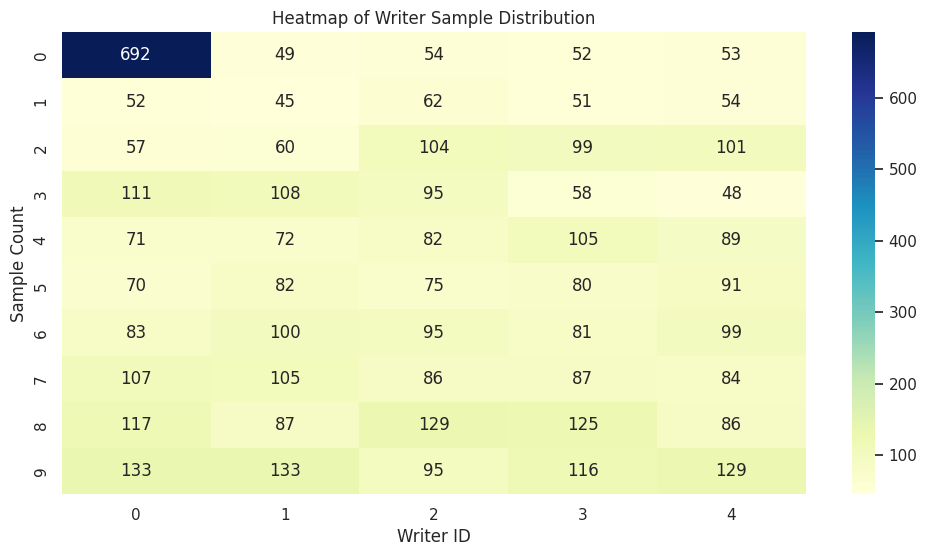

In [16]:
# Heatmap of Writer Sample Distribution
sample_distribution = pd.Series(img_targets).value_counts().sort_index()
sample_matrix = sample_distribution.values.reshape((10, -1))  # Reshaping for the sake of example

plt.figure(figsize=(12, 6))
sns.heatmap(sample_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Writer Sample Distribution")
plt.xlabel("Writer ID")
plt.ylabel("Sample Count")
plt.show()

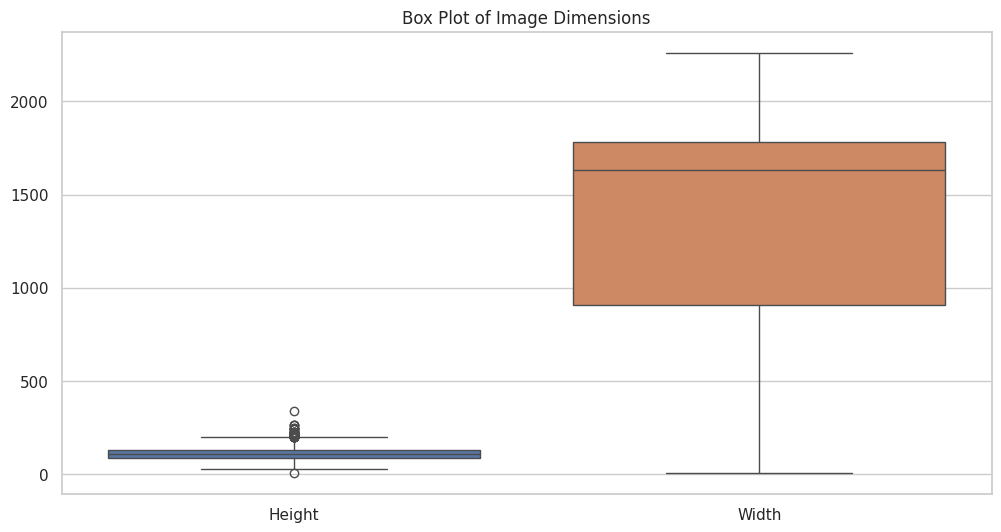

In [15]:
image_sizes = [mpimg.imread(file).shape for file in img_files]
df_sizes = pd.DataFrame(image_sizes, columns=['Height', 'Width'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sizes)
plt.title("Box Plot of Image Dimensions")
plt.show()